<a href="https://colab.research.google.com/github/Arkantrust/r-universe/blob/main/module_6/module_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tips para mejorar las visualizaciones

## [David Dulce](https://github.com/arkantrust/)

En este último módulo terminaremos nuestra introducción al uso de R estudiando visualizaciones con el paquete ggplot2  para mostrar evolución y relación de variables. Así mismo, discutiremos cuatro consejos para mejorar nuestras visualizaciones.

Al finalizar este módulo estarás en capacidad de emplear el paquete ggplot2 de R para:

- Construir  un gráfico de líneas
- Construir una visualización de barras agrupadas y de barras apiladas
- Construir un diagrama de dispersión
- Construir un gráfico de burbujas

In [ ]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# lo cargamos de una vez
install.packages("gapminder")
library(gapminder)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data("gapminder")

glimpse(gapminder)

Rows: 1,704
Columns: 6
$ country   <fct> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan", …
$ continent <fct> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, …
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, …
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 40.8…
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372, 12…
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.1134, …


# Geometrías para mostrar evolución

En el pasado módulo construímos visualizaciones para mostrar la distribución de una o más variables. En este módulo seguiremos empleando la gramática de las visualizaciones para construir gráficos que muestran evolución y relación entre variables. Así mismo, veremos algunos consejos para mejorar las visualizaciones.

Tu primera actividad será leer el Capítulo 4 del libro ["Empezando a visualizar datos con R y ggplot2"](https://www.icesi.edu.co/editorial/empezando-visualizar-2ed/).

##  Gráfico de líneas

Los gráficos de líneas son apropiados para visualizar el comportamiento histórico de una o más variables de clase numeric (variable cuantitativa continua) e integer (variable cuantitativa discreta). También nos permiten comparar el comportamiento en el tiempo de dos o más variables.

Estos gráficos reportan en el eje horizontal el período de tiempo (años, trimestres, meses o días según sea el caso) y en el eje vertical la variable de interés. Para cada periodo se identifica el correspondiente valor de la variable y todos los puntos se unen con líneas rectas. De ahí su nombre de gráfico de líneas. La función `geom_line()` permite construir este tipo de visulizaciones.

Por ejemplo, grafiquemos la evolución del PIB percápita de Colombia. En este caso recuerda que en el eje horizontal tendremos el año (x = year) y en le eje vertical tendremos el PIB percápita (y =gdpPercap).

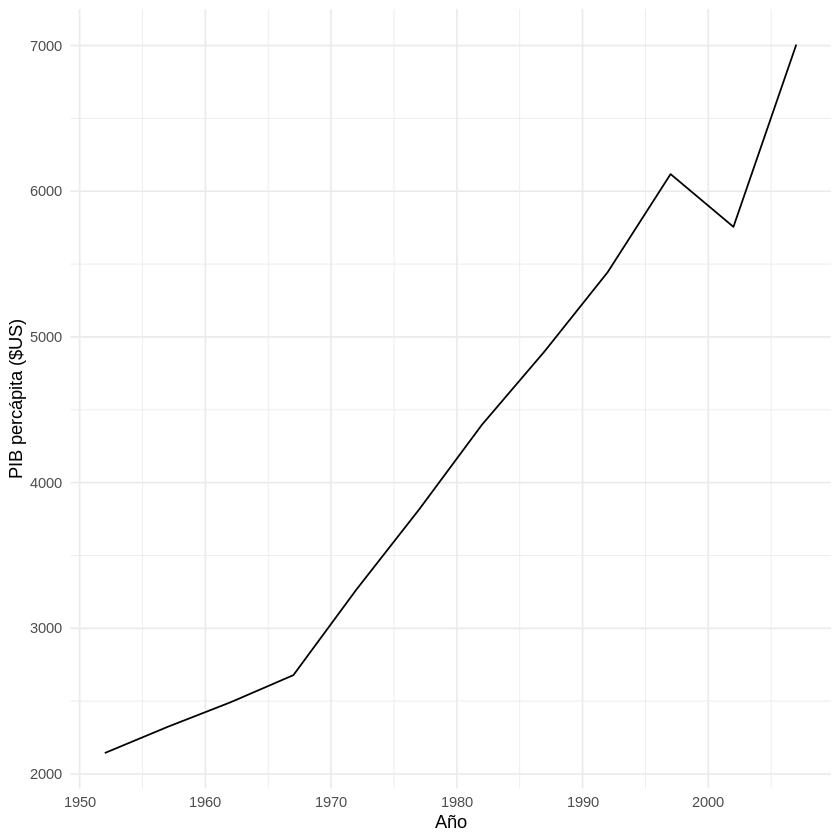

In [ ]:
gapminder %>%
   filter(country == "Colombia") %>%
    ggplot( aes(x = year, y =gdpPercap)) +
    geom_line() +
    labs( y="PIB percápita ($US)",
          x="Año") +
   theme_minimal()

La figura anterior presenta la evolución del PIB percápita de Colombia. En algunas ocasiones también queremos incluir otros países para además comparar la evolución en el tiempo entre países. Esto lo podemos hacer rápidamente. En este caso, dada la estructura de los datos, podemos incluir la variable país de clase factor en el color en la capa Aesthetics.

Por ejemplo, grafiquemos la evolución del PIB percápita de los países de la Alianza del Pacífico (Colombia, Chile, Perú y México). Esto lo podemos hacer con el siguiente código:

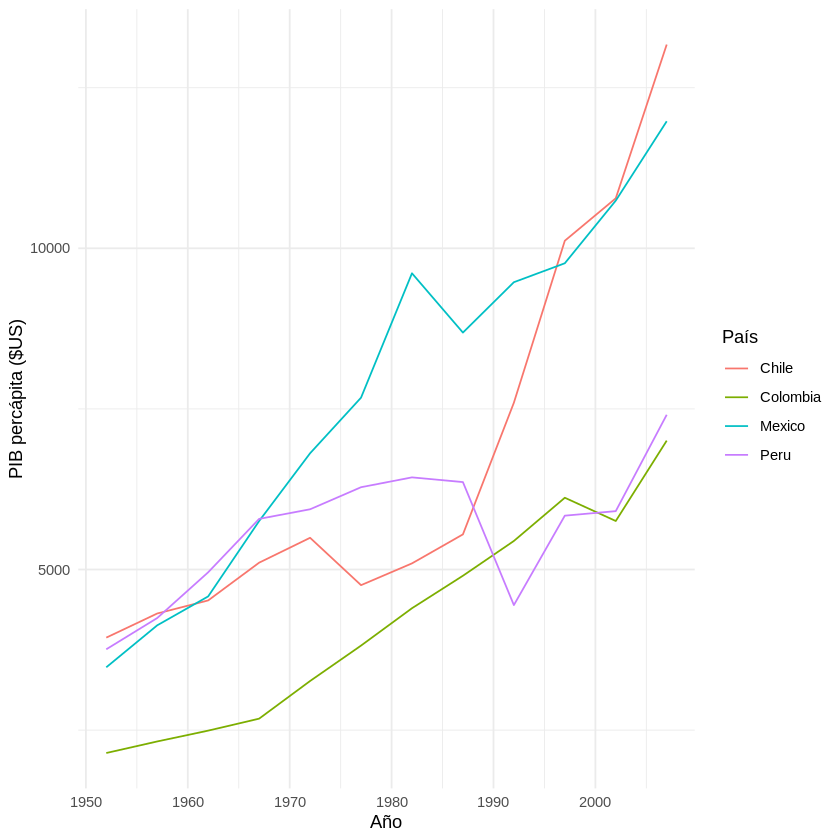

In [ ]:
gapminder %>%
   filter(country %in% c("Colombia", "Peru", "Chile", "Mexico")) %>%
   ggplot( aes(x = year, y =gdpPercap, color = country)) +
    geom_line() +
    labs( y="PIB percápita ($US)",
          x="Año", color = "País") +
    theme_minimal()

## Barras agrupadas

Las barras agrupadas permiten comparar la evolución de la composición en el tiempo de una variable cualitativa de clase factor. Intuitivamente, esta visualización es un gráfico de barras (ver Sección 3.2) reproducido en diferentes periodos. Es decir, permite representar cómo cambia en el tiempo la participación porcentual en el total de cada uno de los posibles valores de la variable cualitativa.

Típicamente, en el eje horizontal tendremos los períodos y en el eje vertical mediremos la participación porcentual de cada uno de los factores. El gráfico de barras agrupadas también lo podemos construir con la función `geom_bar()`. La diferencia en este caso es que tendremos que **especificar qué variable se mapea al eje horizontal y cuál al vertical**.

Construiremos un gráfico de barras para la distribución de los países por continente disponibles en los datos del paquete gapminder para el año 2007.

En esta oportunidad nos gustaría tener el mismo gráfico (en porcentaje) pero para todos los años que hacen parte del objeto gapminder.

Para construir el gráfico necesitamos contar con un objeto de datos que tenga una columna con el número de países por continente (o la participación en el total de países) por año. En esta ocasión, por razones pedagógicas, separemos la preparación de la base de datos de la construcción de la visualización.

In [ ]:
d1 <- gapminder %>%
  # se agrupan los casos por año y continente
  group_by(year, continent) %>%
  # se cuentan los países por cada continente, para cada año
  # frecuencia
  summarise( paises = n()) %>%
  # se crea la nueva variable con la frecuencia relativa
  mutate(Prop_paises = 100 * paises / sum(paises))

glimpse(d1)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


Rows: 60
Columns: 4
Groups: year [12]
$ year        <int> 1952, 1952, 1952, 1952, 1952, 1957, 1957, 1957, 1957, 1957…
$ continent   <fct> Africa, Americas, Asia, Europe, Oceania, Africa, Americas,…
$ paises      <int> 52, 25, 33, 30, 2, 52, 25, 33, 30, 2, 52, 25, 33, 30, 2, 5…
$ Prop_paises <dbl> 36.619718, 17.605634, 23.239437, 21.126761, 1.408451, 36.6…


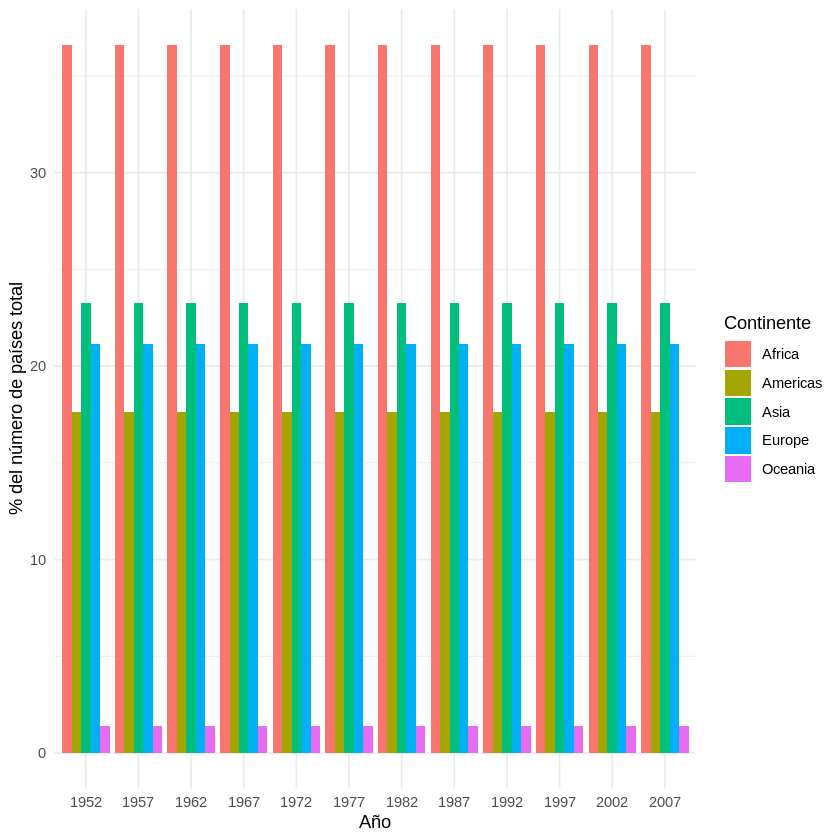

In [ ]:
ggplot(d1, aes(x = as.character(year), y = Prop_paises,
               fill = continent)) +
  geom_bar(position = "dodge", stat = "identity") +
  labs(y = "% del número de países total",
       x = "Año", fill = "Continente") +
  theme_minimal()

Vemos que no ha habido un cambio en la participación de los continentes durante el periodo 1952-2007. Este gráfico en esta ocasión no es interesante, pero esto dependerá de la base de datos que se tenga.

El gráfico de barras agrupadas también puede ser empleado para mostrar la evolución de una variable cuantitativa y una cualitativa.

Por ejemplo, podemos ver cómo ha cambiado la participación en la población mundial de cada continente.

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


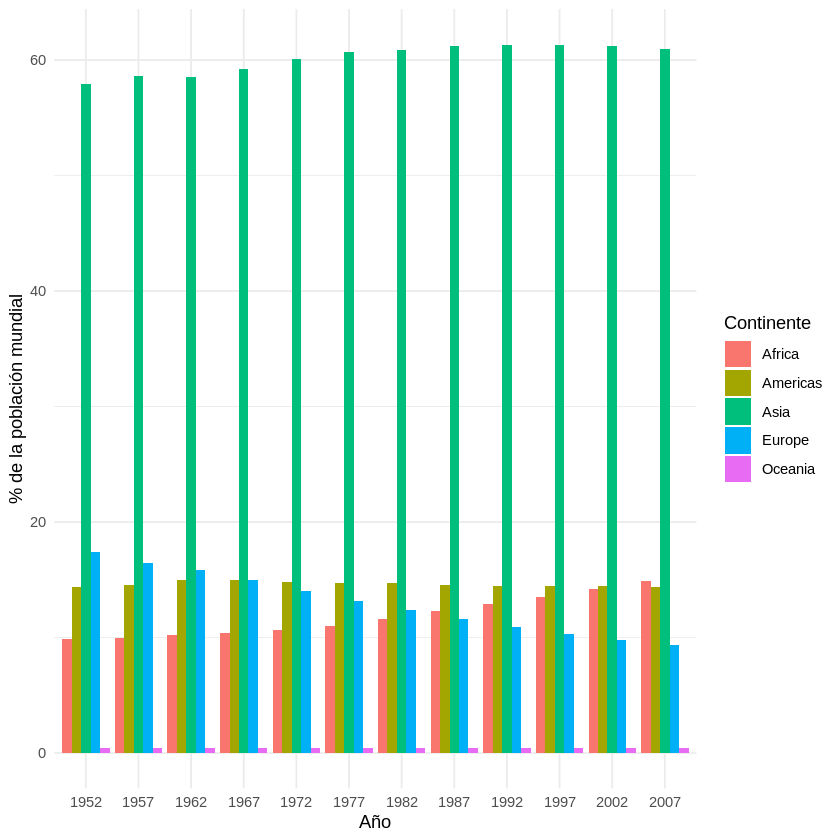

In [ ]:
d2 <- gapminder %>%
      group_by(year, continent) %>%
      summarise( Poblacion = sum(pop)) %>%
      group_by(year) %>%
      mutate(Prop_Poblacion = 100 * Poblacion / sum(Poblacion))

ggplot(d2, aes(x = as.character(year),
               y = Prop_Poblacion, fill = continent))+
  geom_bar(position = "dodge", stat="identity")+
  labs(y = "% de la población mundial",
       x = "Año", fill = "Continente")+
  theme_minimal()

Puedes observar que Asia es el continente más poblado y su participación ha venido creciendo levemente.

## Columnas apiladas

Otra alternativa a las barras agrupadas son las barras apiladas. En este caso, como su nombre lo implica, las barras están una encima de la otra. Esta visualización implica una leve modificación al código que genera las barras agrupadas, en el argumento de posición de la función `geom_bar()` empleamos `position = “stack”`.

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


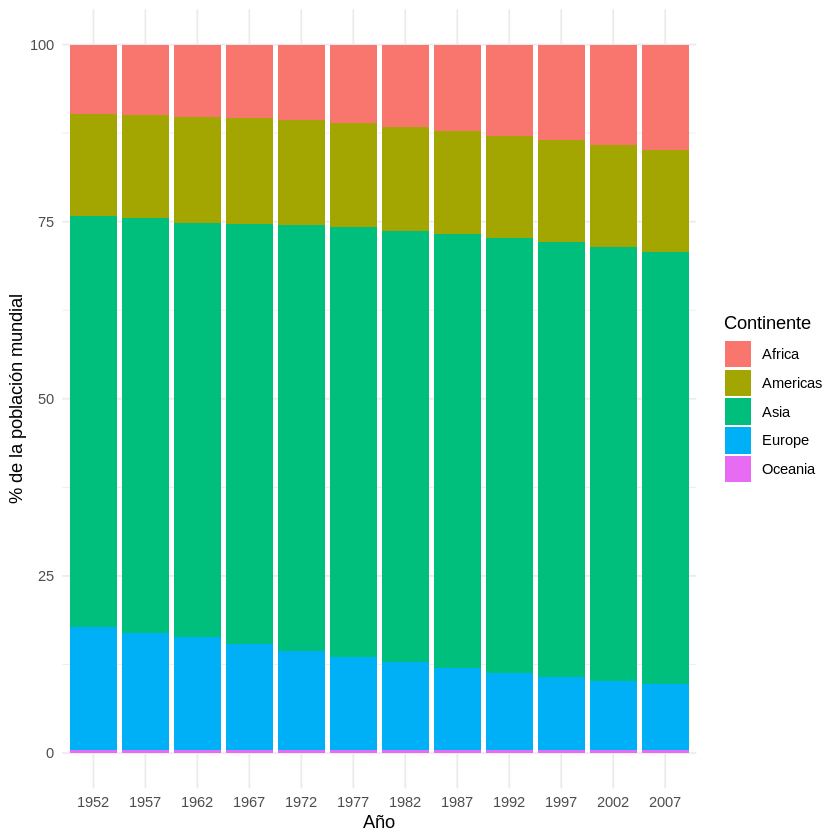

In [ ]:
d2 <- gapminder %>%
      group_by(year, continent) %>%
      summarise( Poblacion = sum(pop)) %>%
      group_by(year) %>%
      mutate(Prop_Poblacion = 100 * Poblacion / sum(Poblacion))

ggplot(d2, aes(x = as.character(year),
               y = Prop_Poblacion, fill = continent))+
  geom_bar(position = "stack", stat="identity")+
  labs(y = "% de la población mundial",
       x = "Año", fill = "Continente")+
  theme_minimal()

## Ejercicio Evolución

Practiquemos ahora las visualizaciones que nos permiten mostrar la distribución de las variables.

[Datos (Pob_cinco_ciudades.txt)](https://www.icesi.edu.co/moodle/pluginfile.php/1050099/mod_lesson/page_contents/2614/Pob_cinco_ciudades.txt).

En este taller trabajaremos con la población anual de las 5 principales ciudades de Colombia.

La información la puedes encontrar en el archivo `Pob_cinco_ciudades.txt`, el cual fue creado a partir de datos del DANE.

La base de datos contiene la población anual para las ciudades de Bogotá, Medellín, Cali, Barranquilla y Bucaramanga.

Carga el archivo en el objeto pob y constata que todas las variables quedaron bien cargadas.

In [ ]:
# Carga de bases de datos
pob <- read.table("Pob_cinco_ciudades.txt", header = TRUE, sep = ",")
glimpse(pob)

Rows: 38
Columns: 6
$ Year         <int> 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 199…
$ Bogota       <int> 3804636, 3972841, 4139946, 4306433, 4471841, 4635514, 479…
$ Medellin     <int> 1450177, 1477968, 1509845, 1541818, 1573460, 1604309, 163…
$ Cali         <int> 1591869, 1632266, 1669597, 1704288, 1735943, 1764695, 179…
$ Barranquilla <int> 833919, 850019, 865925, 881523, 896841, 911760, 926458, 9…
$ Bucaramanga  <int> 324953, 331550, 339107, 346661, 354354, 362160, 370185, 3…


### Ejercicio 1

#### a.

Genera una visualización de la evolución de la población de Cali.

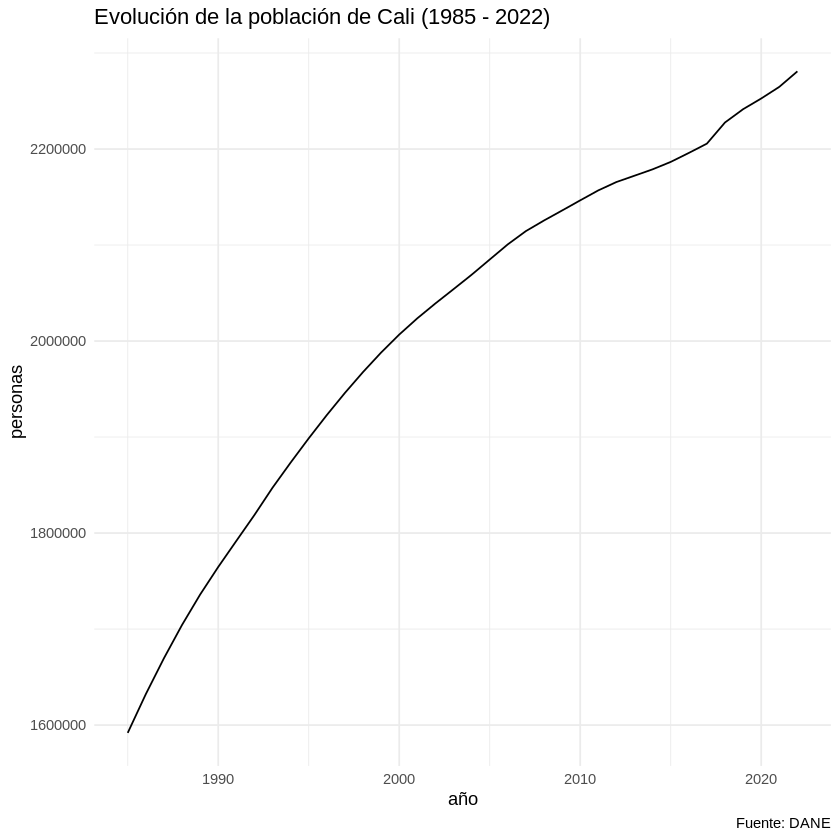

In [ ]:
ggplot(pob, aes(x = Year, y = Cali)) +
    geom_line() +
   labs( title= "Evolución de la población de Cali (1985 - 2022)",
         y = "personas",
          x = "año", caption = "Fuente: DANE") +
    theme_minimal()

#### b.

Ahora crea una visualización que permita mostrar la evolución de la población de las 5 ciudades.

Esto implica hacer un par de modificaciones en la base de datos. Una forma de hacer esto empleando la función `rbond()` que mencionamos la primera semana.

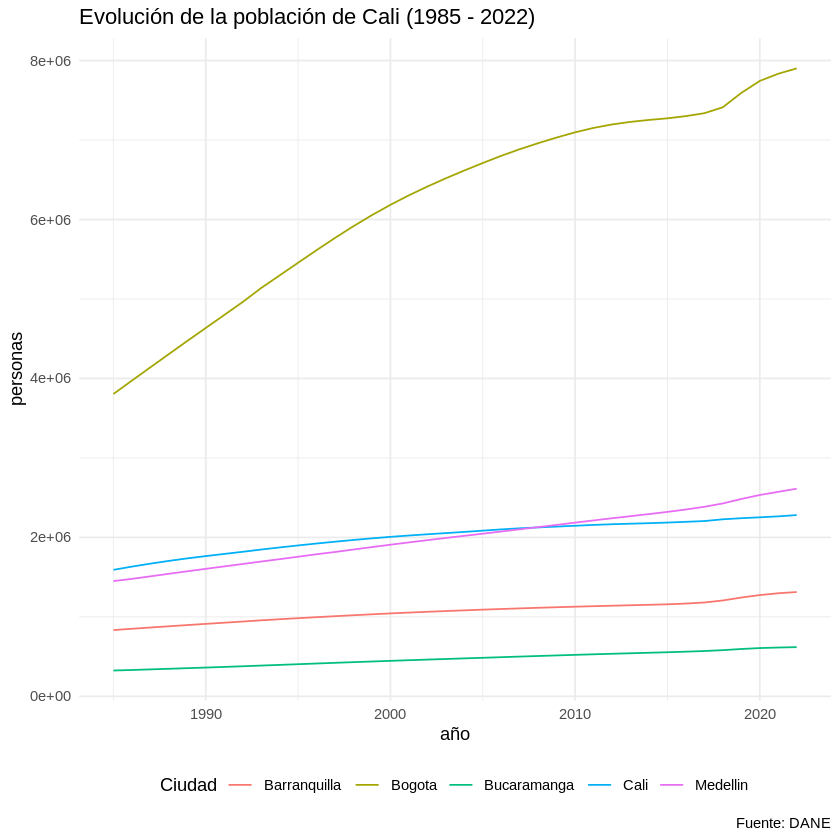

In [ ]:
pob %>%
  gather(Ciudad, Poblacion, Bogota, Medellin, Cali, Barranquilla, Bucaramanga) %>%
  ggplot(aes(x = Year, y = Poblacion, color = Ciudad)) +
  geom_line() +
   labs(
    title= "Evolución de la población de Cali (1985 - 2022)",
    y = "personas",
    x = "año",
    caption = "Fuente: DANE"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom")

### Ejercicio 2

Ahora construye una visualización que permita mostrar cómo ha evolucionado la participación de cada una de las cinco ciudades en la población total de las cinco principales ciudades.

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


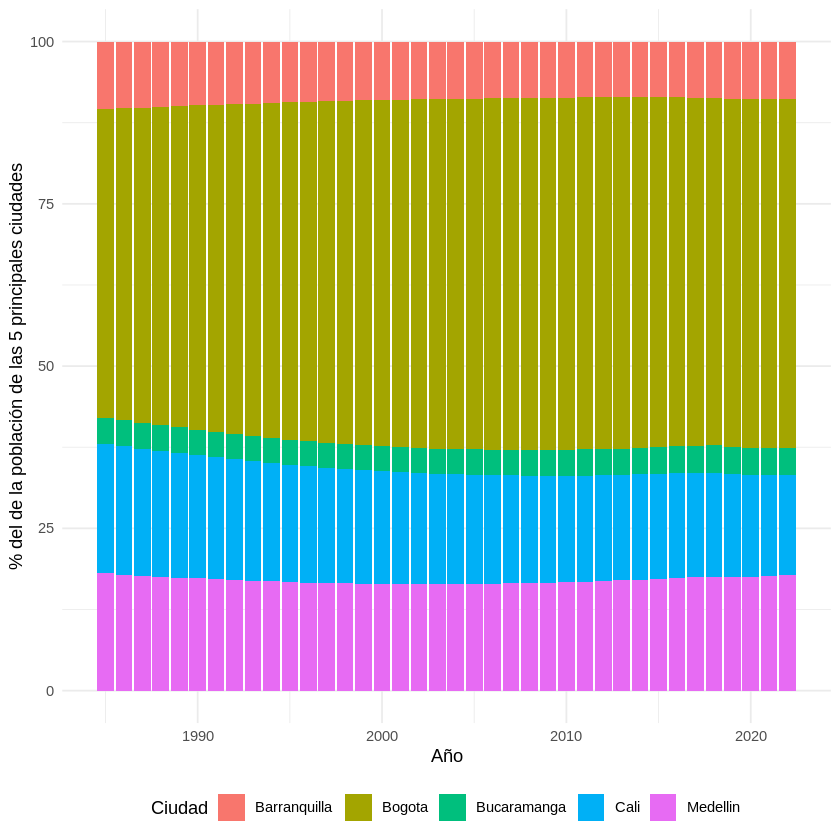

In [ ]:
pob %>%
  gather(Ciudad, Poblacion, Bogota, Medellin, Cali, Barranquilla, Bucaramanga) %>%
  group_by(Year, Ciudad) %>%
  summarise( Pob = sum(Poblacion)) %>%
  group_by(Year) %>%
  mutate(Prop_Poblacion = 100 *Pob / sum(Pob)) %>%

  ggplot(aes(x = Year, y = Prop_Poblacion, fill = Ciudad))+
  geom_bar(position = "stack", stat="identity") +
  labs(
    y = "% del de la población de las 5 principales ciudades",
    x = "Año",
    fill = "Ciudad"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom")

## Preguntas 1

- Cuando se quiere mostrar la evolución de la composición en el tiempo de una variable de clase factor es recomendable emplear `un gráfico de barras apiladas`. Creo que se refiere a barras agrupadas, pero okay.

- ¿Cuál de los siguientes códigos pueden generar esta visualización?

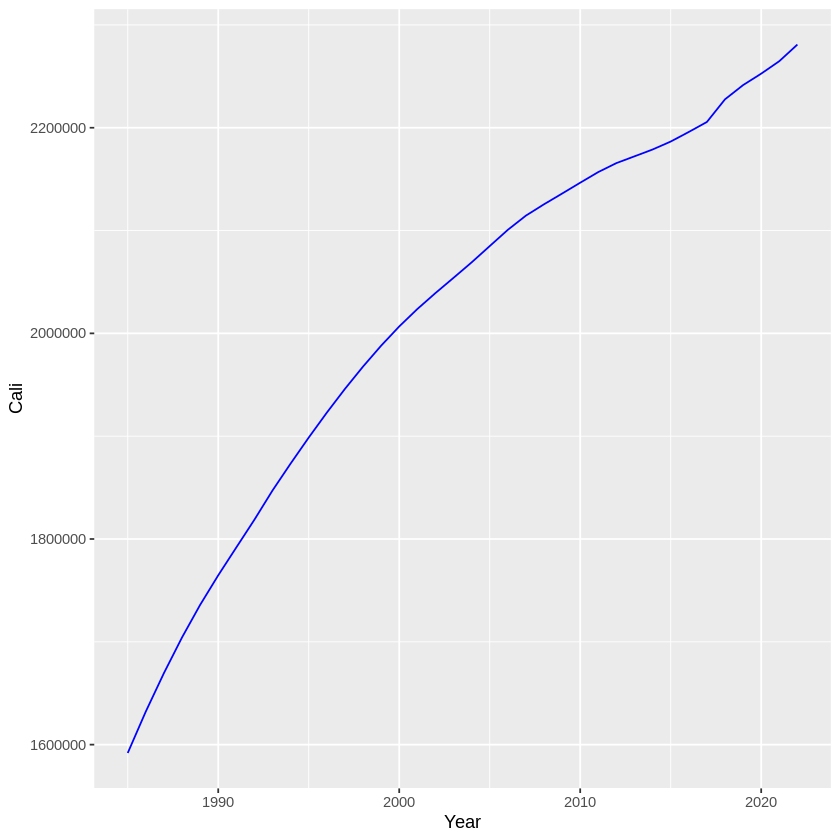

In [ ]:
ggplot(pob, aes(x = Year, y = Cali)) + geom_line(col = "blue")

# Geometrías para mostrar relación

Ya tenemos clara la gramática empleada para la construcción de visualizaciones. Ahora, concentremos en aquellas visualizaciones que permiten mostrar la relación entre varias variables.  

Lee el Capítulo 5 del libro. Ya sabes dónde encontrar el libro "Empezando a visualizar datos con R y ggplot2".

La gráfica más empleada para mostrar la relación entre dos variables es el diagrama de dispersión. Esta visualización es muy versátil y nos permite incluir aún más variables si jugamos con el tamaño de los puntos (conocido como gráfico de burbujas), su color o su tamaño. En este capítulo nos concentraremos en este gráfico.

## Diagrama de dispersión

Cuando se busca mostrar una relación entre dos variables numéricas, lo mejor es hacer uso de un diagrama de dispersión. En la siguiente figura se muestra un ejemplo de la relación entre la expectativa de vida y el PIB percápita para todos los países en 2007. Este fue el primer gráfico que aprendimos a construir en el Capítulo 2.

Recuerda que este gráfico lo podemos generar con la función `geom_point()` empleando el siguiente código:

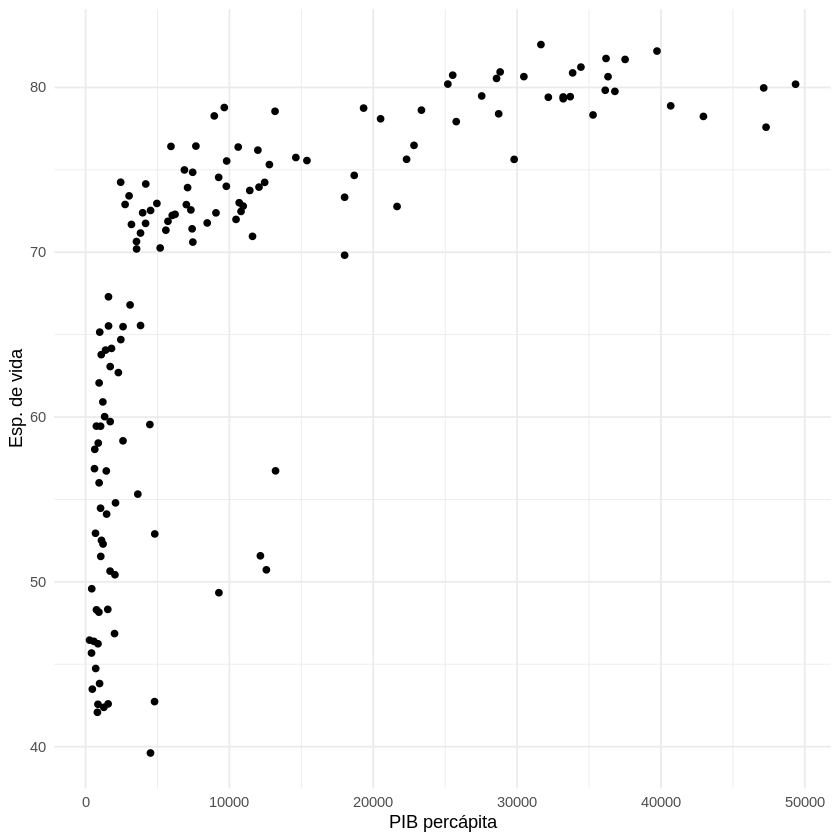

In [ ]:
gapminder %>%
  filter(year == 2007) %>%
  ggplot(aes(x = gdpPercap, y = lifeExp)) +
  geom_point() +
  labs(  x="PIB percápita", y="Esp. de vida") +
  theme_minimal()

### Fluctuaciones

En ocasiones, al mapear datos, puede ocurrir el fenómeno de superposición (over-plotting), donde los puntos se tapan entre sí, dificultando la comprensión de la visualización. Para resolver este problema, podemos emplear la función `geom_jitter()`, que añade una pequeña variación aleatoria a la ubicación de cada punto. Esto evita la superposición y mejora la comprensión de los datos.

Por ejemplo, en la siguiente figura se compara una visualización con `geom_point()` (figura a) y otra con `geom_jitter()` (figura b).

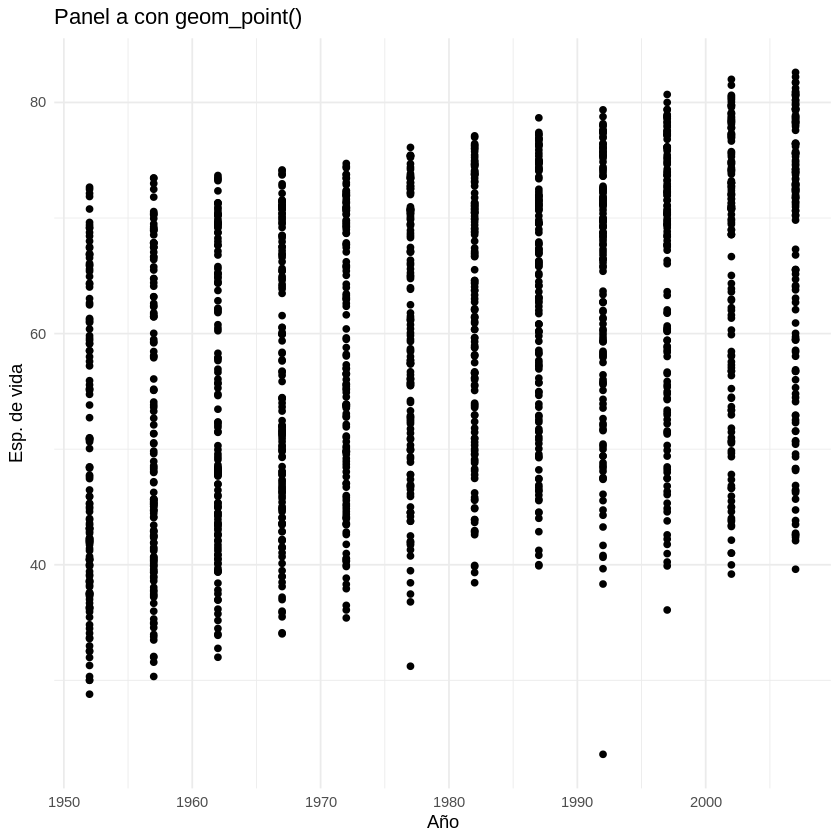

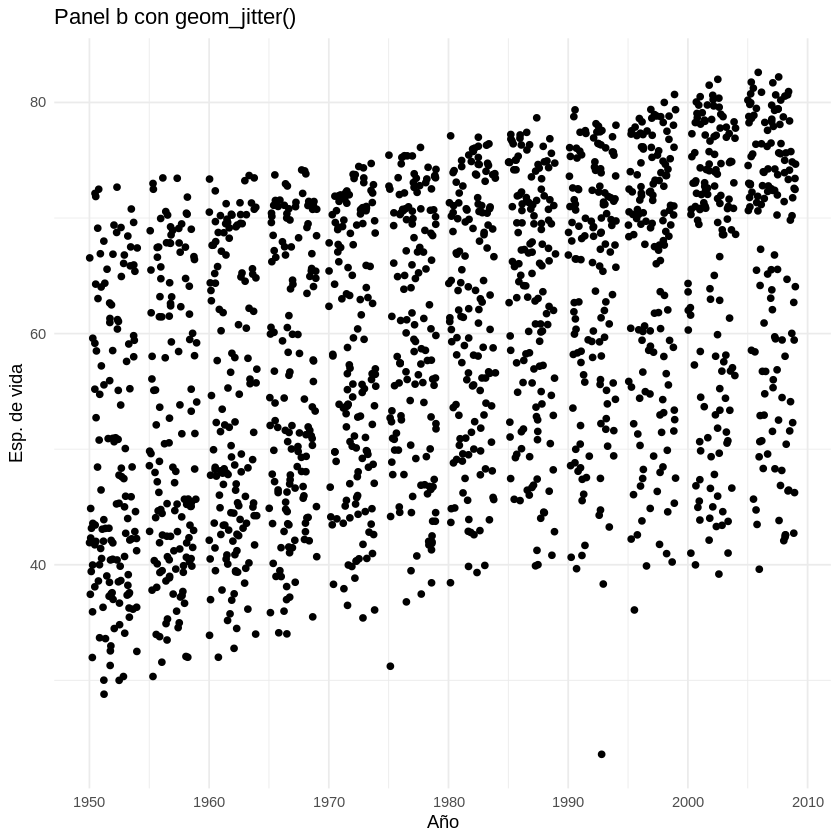

In [ ]:
# figura a
ggplot(gapminder, aes(x = year, y = lifeExp)) +
  geom_point() +
  labs(
    title = "Panel a con geom_point()",
    x = "Año",
    y="Esp. de vida"
  ) +
  theme_minimal()

# panel b
ggplot(gapminder, aes(x = year, y = lifeExp)) +
  geom_jitter() + # notese el uso de jitter
  labs(
    title = "Panel b con geom_jitter()",
    x = "Año",
    y = "Esp. de vida"
  ) +
  theme_minimal()

En la figura a, los puntos están superpuestos, lo que dificulta la interpretación de la relación entre el año y la esperanza de vida al nacer. En cambio, en la figura b, se ha aplicado `geom_jitter()`, lo que permite una distribución más clara de los puntos.

## Gráfico de búrbujas

En algunas situaciones será interesante incluir una tercera variable numérica a nuestra visualización. El diagrama de dispersión **permite una tercera variable numérica mapeada al tamaño del punto**.

Esto tendrá una apariencia de burbujas, por eso el nombre de esta visualización. En general será mucho más clara y transmitirá mejor el mensaje que emplear gráficas en tres dimensiones.

Generarla es muy sencillo, tendremos que mapear nuestra tercera variable numérica al argumento size de la capa Aesthetic.

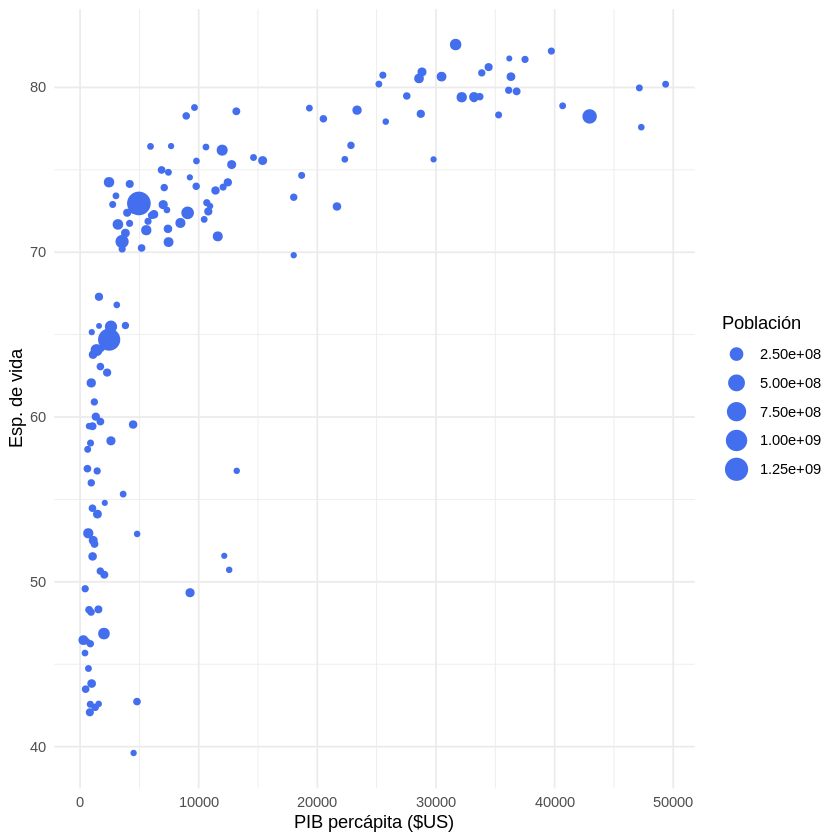

In [ ]:
gapminder %>%
  filter(year == 2007) %>%
  ggplot(aes(x = gdpPercap, y = lifeExp, size = pop)) +
  geom_point(col = "royalblue2") +
  labs(
    x = "PIB percápita ($US)",
    y = "Esp. de vida",
    size = "Población"
  ) +
  theme_minimal()

## Diagrama de dispersión y variables cualitativas

También podemos incluir variables cualitativas en un diagrama de dispersión. Esto lo podemos hacer **mapeando la variable cualitativa al color de los puntos**. Esto nos da bastante flexibilidad en nuestros gráficos. Es más, podríamos incluir una **quinta variable en nuestro diagrama de dispersión si mapeamos una variable cualitativa a la forma del punto**. Pero tenemos que ser cuidadosos de no saturar nuestra visualización. Típicamente en las visualizaciones “menos es más”.

Por ejemplo, incluyamos la variable continente a nuestro gráfico de burbujas.

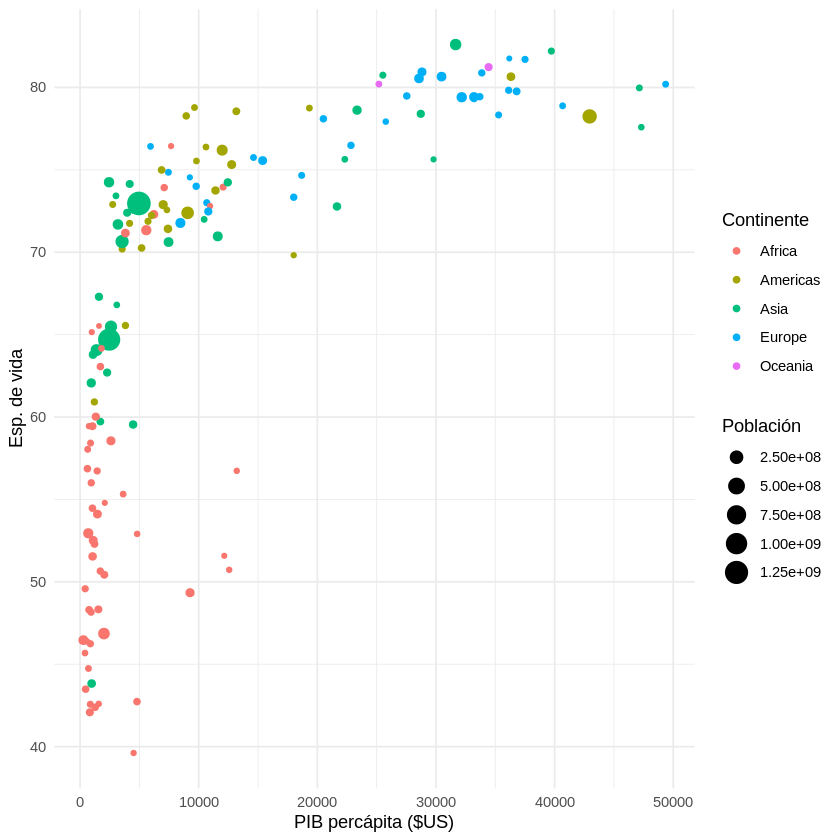

In [ ]:
gapminder %>%
  filter(year == 2007) %>%
  ggplot(aes(x = gdpPercap, y = lifeExp, size = pop, col = continent )) +
  geom_point() +
  labs(
    x = "PIB percápita ($US)",
    y = "Esp. de vida",
    size = "Población",
    col = "Continente"
  ) +
  theme_minimal()

## Ejercicio Relación

Practiquemos ahora las visualizaciones que nos permiten mostrar la relación entre variables.

En este taller trabajaremos nuevamente con una base de datos que incluye todas las canciones que han estado en el [Top 200 de las listas semanales (Global) de Spotify en 2020 y 2021](https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021). Esta base está en el archivo `spotify_dataset.csv`.

La base cuenta con las siguientes 23 variables:



`Highest.Charting.Position`: La posición más alta en la que ha estado la canción en las listas semanales de Spotify Top 200 Global Charts en 2020 y 2021.

`Number.of.Times.Charted`: El número de veces que la canción ha estado en la lista de las 200 mejores canciones semanales de Spotify en 2020 y 2021.

`Week.of.Highest.Charting`: La semana en la que la canción tuvo la posición más alta en las listas globales semanales de las 200 mejores canciones de Spotify en 2020 y 2021.

`Song.Name`: El nombre de la canción que ha estado en las Top 200 Weekly Global Charts de Spotify en 2020 & 2021.

`Song.ID`: El ID de la canción proporcionado por Spotify (único para cada canción).

`Streams`: Número aproximado de streams que tiene la canción.

`Artist`: El artista o artistas principales que han participado en la elaboración de la canción.

`Artist.Followers`: El número de seguidores que tiene el artista principal en Spotify.

`Genre`: Los géneros a los que pertenece la canción.

`Release.Date`: La fecha inicial de lanzamiento de la canción.

`Weeks.Charted`: Las semanas que la canción ha estado en el Top 200 de las listas semanales de Spotify en 2020 y 2021.

`Popularity`: La popularidad de la canción. El valor estará entre 0 y 100, siendo 100 la más popular.

`Danceability`: La bailabilidad describe lo adecuado que es un tema para bailar basándose en una combinación de elementos musicales que incluyen el tempo, la estabilidad del ritmo, la fuerza del compás y la regularidad general. Un valor de 0,0 es el menos bailable y 1,0 es el más bailable.

`Acousticness`: Una medida de 0,0 a 1,0 de si la pista es acústica.

`Energy`: La energía es una medida de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad. Normalmente, las pistas energéticas se sienten rápidas, fuertes y ruidosas.

`Liveness`: Detecta la presencia de público en la grabación. Los valores más altos de liveness representan una mayor probabilidad de que la pista haya sido interpretada en directo.

`Loudness`: La sonoridad general de una pista en decibelios (dB). Los valores de sonoridad se promedian en toda la pista. Los valores suelen oscilar entre -60 y 0 db.

`Speechiness`: La expresividad detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente hablada sea la grabación (por ejemplo, un programa de entrevistas, un audiolibro o una poesía), más se acercará a 1,0 el valor del atributo.

`Tempo`: El tempo global estimado de una pista en pulsaciones por minuto (BPM). En la terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración media de los tiempos.

`Duration..ms.`: Duración de la canción en milisegundos.

`Valence`: Una medida de 0,0 a 1,0 que describe la positividad musical que transmite una pista. Las pistas con valencia alta suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con valencia baja suenan más negativas (por ejemplo, tristes, deprimidas, enfadadas).

`Chord`: El acorde principal de la canción instrumental.

En un taller pasado creamos el objeto `spotify` en el que cargamos la base de datos disponible en el archivo `spotify_dataset.csv`. Ese objeto y otros que teníamos en ese momento en el working space los guardamos con el nombre `Ws_ejer_cap_8.RData`. Carga el archivo.

In [ ]:
load(file = "Ws_ejer_cap_8.RData")

### a.

Crea una visualización que permita mostrar la relación entre las reproducciones (Streams) y la bailabilidad (Danceability).

Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


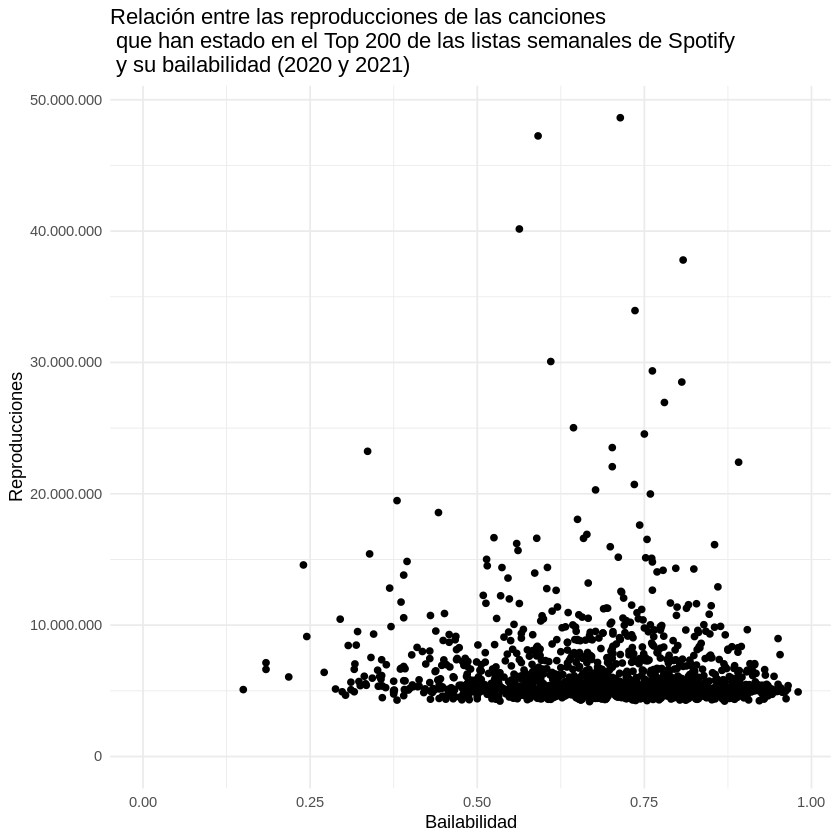

In [ ]:
library(scales)
ggplot(spotify, aes(x = Danceability, y = Streams)) +
    geom_point() +
  scale_y_continuous(limits=c(0,NA), labels = comma_format(big.mark = ".",
                                           decimal.mark = ",")) +
  scale_x_continuous(limits=c(0,NA)) +
   labs( title= "Relación entre las reproducciones de las canciones \n que han estado en el Top 200 de las listas semanales de Spotify \n y su bailabilidad (2020 y 2021)",
         y = "Reproducciones",
          x = "Bailabilidad") +
    theme_minimal()

### b.

Ahora crea visualiza para la relación entre las reproducciones (Streams) y el tempo (Tempo).

Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


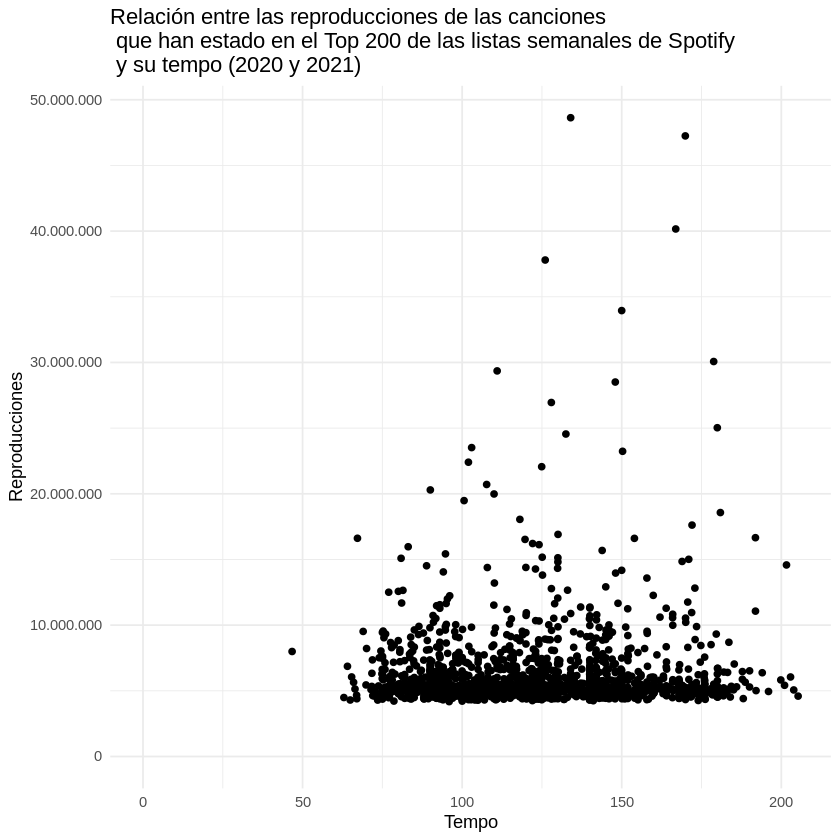

In [ ]:
ggplot(spotify, aes(x = Tempo, y = Streams)) +
    geom_point() +
    scale_y_continuous(limits=c(0,NA), labels = comma_format(big.mark = ".",
                                           decimal.mark = ",")) +
  scale_x_continuous(limits=c(0,NA)) +
   labs( title= "Relación entre las reproducciones de las canciones \n que han estado en el Top 200 de las listas semanales de Spotify \n y su tempo (2020 y 2021)",
         y = "Reproducciones",
          x = "Tempo") +
    theme_minimal()'

### c.

Ahora crea visualiza para la relación entre las reproducciones (Streams) y la duración (Duration..ms.).

Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


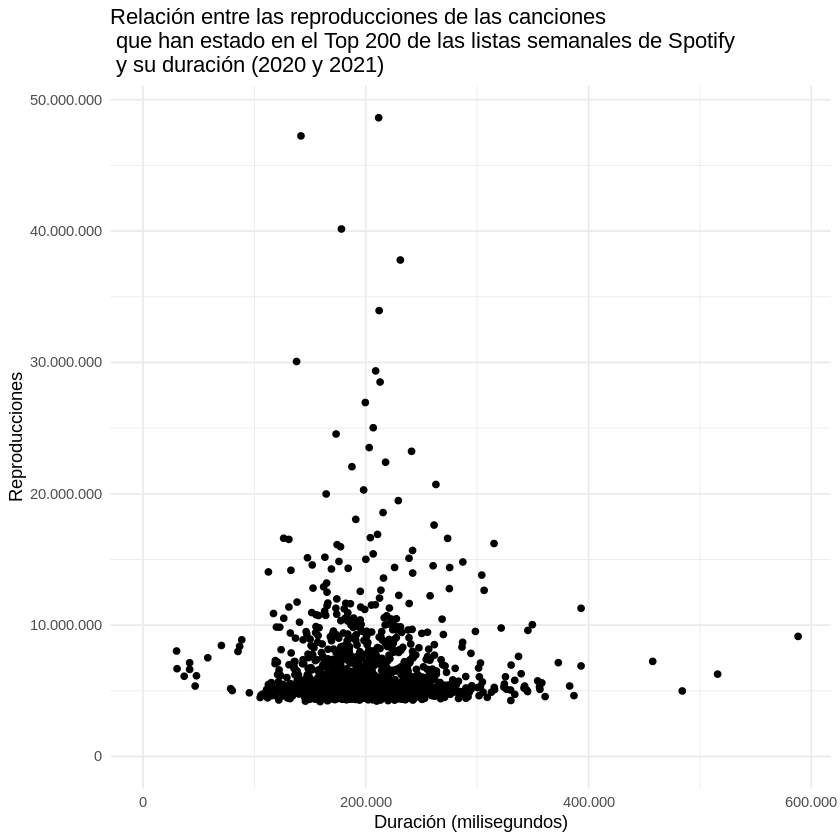

In [ ]:
ggplot(spotify, aes(x = Duration..ms., y = Streams)) +
    geom_point() +
      scale_y_continuous(limits=c(0,NA), labels = comma_format(big.mark = ".",
                                           decimal.mark = ",")) +
  scale_x_continuous(limits=c(0,NA), labels = comma_format(big.mark = ".",
                                           decimal.mark = ",")) +
   labs( title= "Relación entre las reproducciones de las canciones \n que han estado en el Top 200 de las listas semanales de Spotify \n y su duración (2020 y 2021)",
         y = "Reproducciones",
          x = "Duración (milisegundos)") +
    theme_minimal()

### d.

Crea una visualiza para la relación entre las reproducciones (Streams), la duración (Duration..ms.) y tempo (Tempo).

Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


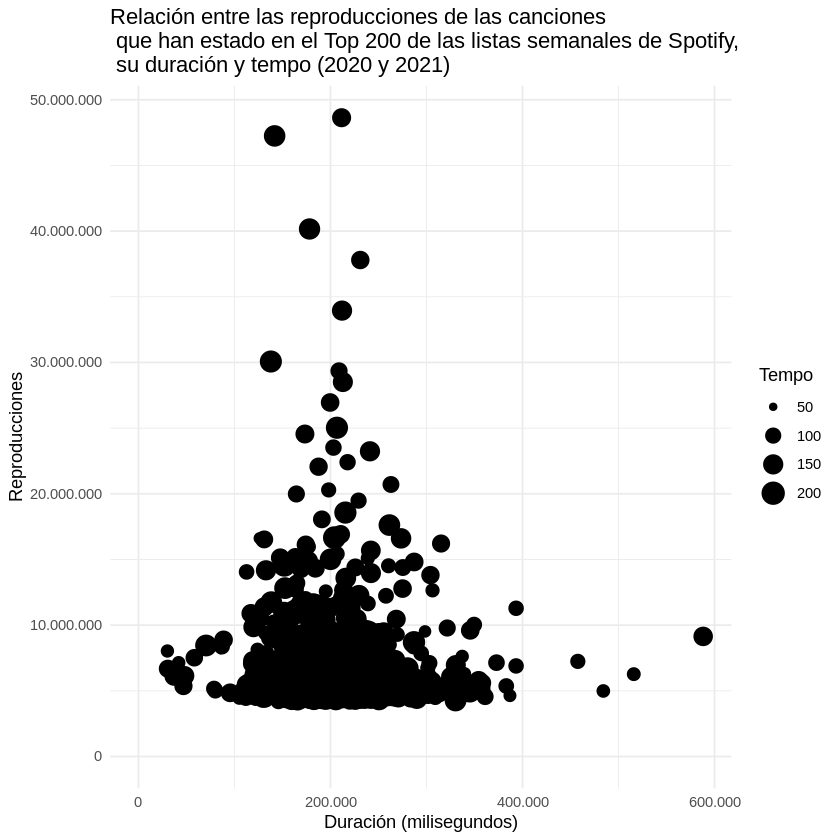

In [ ]:
ggplot(spotify, aes(x = Duration..ms., y = Streams, size = Tempo)) +
    geom_point() +
      scale_y_continuous(limits=c(0,NA), labels = comma_format(big.mark = ".",
                                           decimal.mark = ",")) +
  scale_x_continuous(limits=c(0,NA), labels = comma_format(big.mark = ".",
                                           decimal.mark = ",")) +
   labs( title= "Relación entre las reproducciones de las canciones \n que han estado en el Top 200 de las listas semanales de Spotify, \n su duración y tempo (2020 y 2021)",
         y = "Reproducciones",
          x = "Duración (milisegundos)") +
    theme_minimal()

### e.

Finalmente, crea una visualiza para la relación entre las reproducciones (Streams), su popularidad (Popularity) y el acorde (Chord).

Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


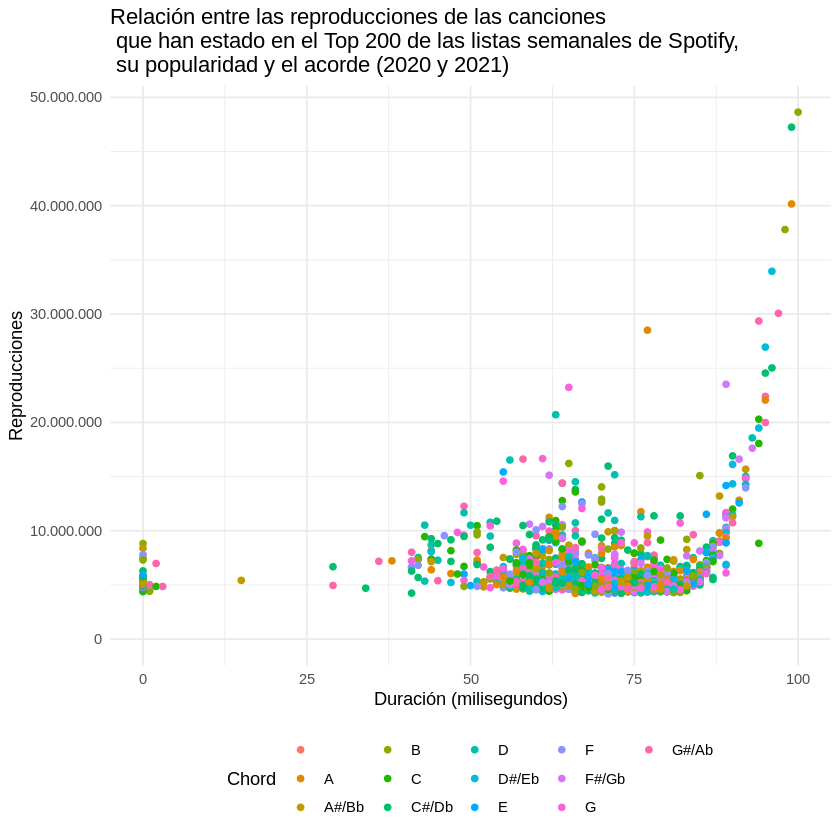

In [ ]:
ggplot(spotify, aes(x = Popularity, y = Streams, col = Chord)) +
    geom_point() +
      scale_y_continuous(limits=c(0,NA), labels = comma_format(big.mark = ".",
                                           decimal.mark = ",")) +
  scale_x_continuous(limits=c(0,NA), labels = comma_format(big.mark = ".",
                                           decimal.mark = ",")) +
   labs( title= "Relación entre las reproducciones de las canciones \n que han estado en el Top 200 de las listas semanales de Spotify, \n su popularidad y el acorde (2020 y 2021)",
         y = "Reproducciones",
          x = "Duración (milisegundos)") +
    theme_minimal() + theme(legend.position = "bottom")

## Preguntas 2

- ¿Cuál de los siguientes códigos pueden generar esta visualización?

Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


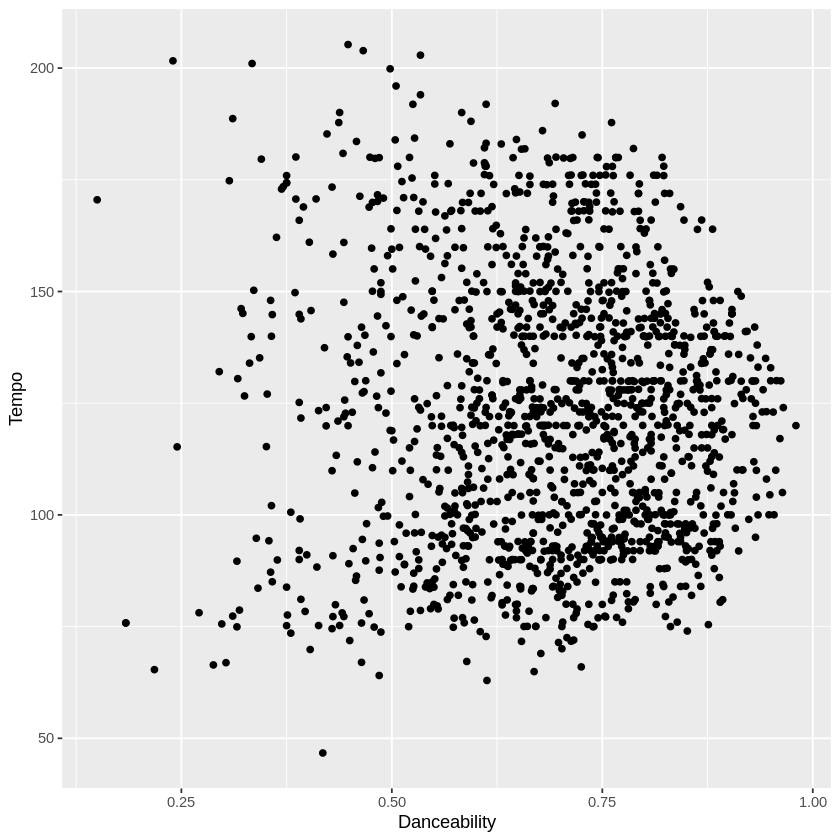

In [ ]:
ggplot(spotify, aes(x = Danceability, y = Tempo)) + geom_point()

- Si se desea visualizar la relación entre tres variables de clase numeric, la mejor opción es emplear `un gráfico de burbujas`.

¿Cuál de los siguientes códigos pueden generar esta visualización?

Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


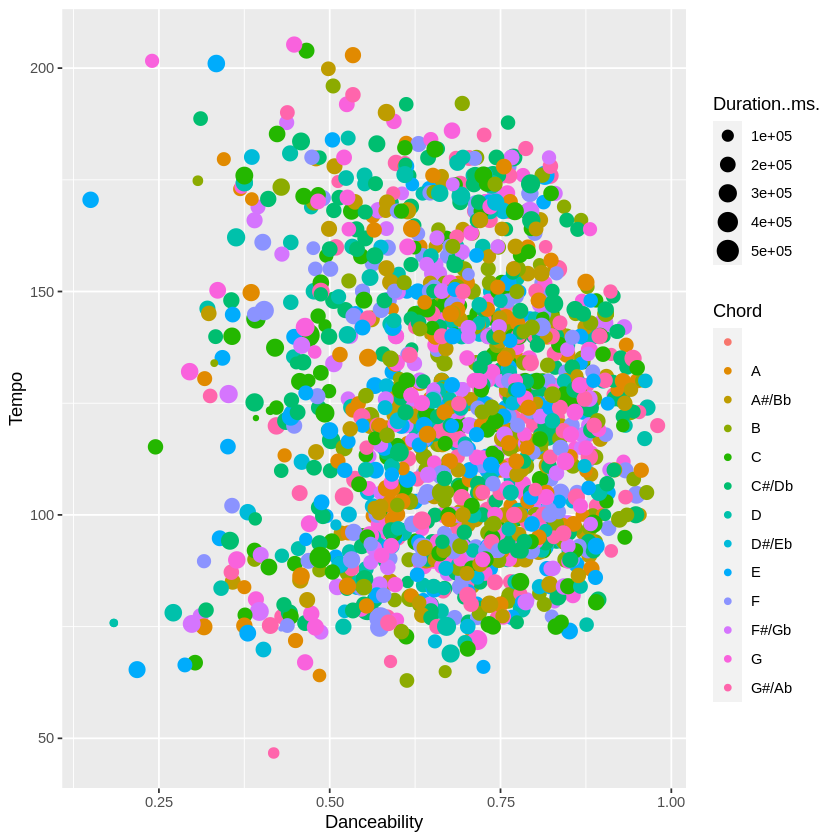

In [ ]:
ggplot(spotify, aes(x = Danceability, y = Tempo, size = Duration..ms., col = Chord)) + geom_point()


# Recomendaciones para mejorar una visualización

Ya tenemos clara la gramática empleada para la construcción de visualizaciones y las principales geometrías para mostrar distribución, evolución y relación.  Ahora, concentremos en unas recomendaciones  para mejorar nuestras visualizaciones.

Lee el Capítulo 6 del libro.

Para empezar la construcción de una visualización siempre deberíamos responder por lo menos las siguientes tres preguntas:

- ¿Cuál es el mensaje que queremos comunicar?
- ¿Qué variables de las disponibles permiten comunicar el mensaje?
- ¿Quién es mi audiencia?

Estas preguntas nos ayudan a determinar las capas de la visualización. Y al momento de construir nuestras visualizaciones deberíamos tener en cuenta que nuestros gráficos deberán siempre:

- Mostrar fielmente los datos. Esto ayuda a que las decisiones que puedan ser tomadas con las visualizaciones no estén sesgadas a datos distorsionados.
- Reducir las distracciones. Es decir no incluir elementos innecesarios en nuestras visualizaciones. En la construcción de una buena visualización, ¡menos es más!
- Agregar texto cuando sea posible. El texto facilita la comunicación y nos permite enfatizar nuestro mensaje.

## Datos Ordenados

La visualización puede tener un mayor impacto ordenando los datos. La lectura de una visualización con datos ordenados es mucho más sencilla para la audiencia y esto termina por hacerla más simple y efectiva.

Por defecto, las visualizaciones que contienen una variable de clase character o factor, suelen ordenarse alfabéticamente. Por ejemplo, construyamos una visualización para el PIB percápita del 2007 de todos los países del continente americano.

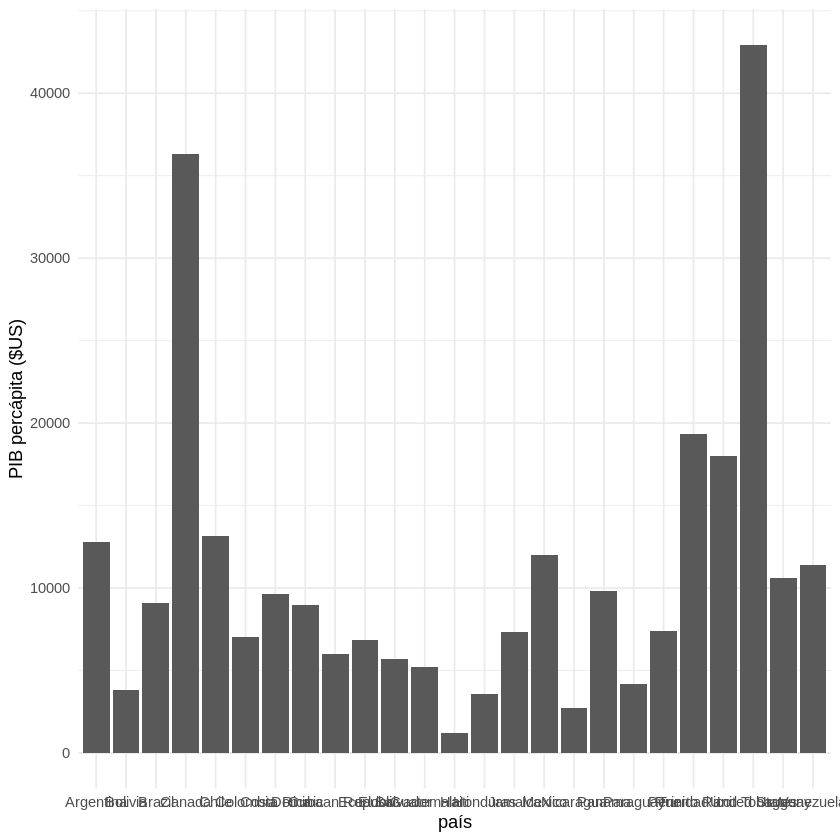

In [ ]:
gapminder %>%
  filter(year == 2007, continent == c("Americas")) %>%
  ggplot( aes(x=country, y=gdpPercap) ) +
    geom_bar(stat="identity") +
    labs(x = "país", y = "PIB percápita ($US)") +
    theme_minimal()

El mensaje no es muy claro, podemos mejorar sustancialmente la visualización si hacemos dos cosas:

- Volteemos los ejes en la capa de Coordenadas con la función `coord_flip()`. Esto le dará más espacio a los nombres de los países.

- Ordenemos los países por su PIB percápita. Además, empleemos un “truco” con la variable país al convertirla en una variable de clase factor

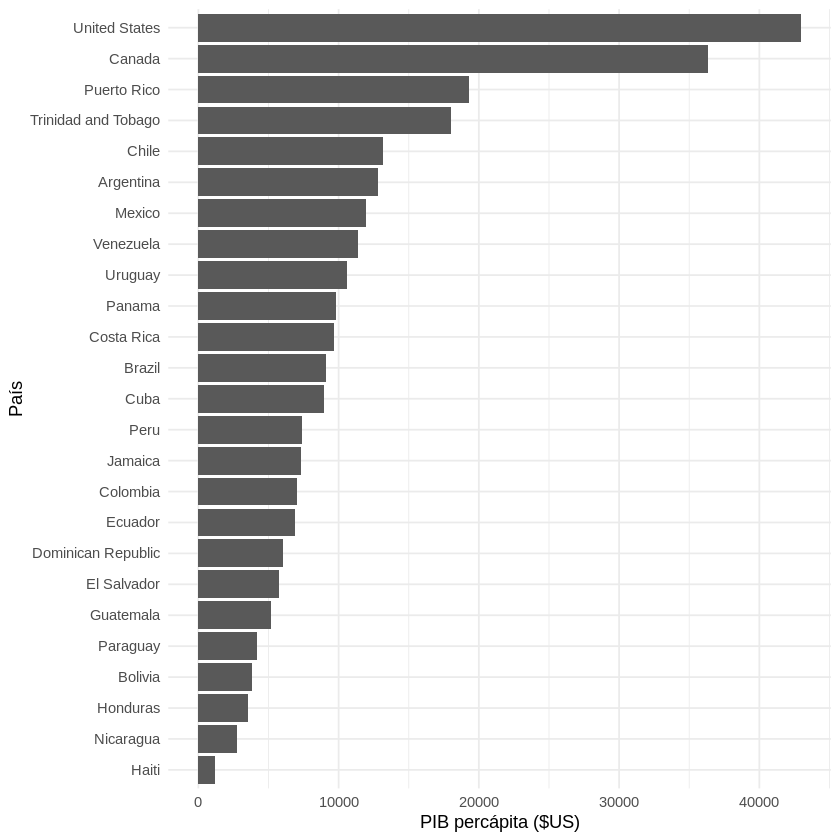

In [ ]:
gapminder %>%
  filter(year == 2007, continent == c("Americas")) %>%
  arrange(gdpPercap) %>%
  mutate(country=factor(country, country)) %>%
  ggplot( aes(x=country, y=gdpPercap) ) +
    geom_bar(stat="identity") +
    labs(x = "País", y = "PIB percápita ($US)") +
    coord_flip() +
    theme_minimal()

## Cuidado con los colores que no comunican nada

El uso de colores en las visualizaciones debe hacerse con mucho cuidado. Los colores, al llamar la atención de la audiencia, deben transmitir algo. Muchos colores pueden resultar engañosos si su uso no es el adecuado, como se muestra en la figura de abajo, donde la cantidad de colores hace muy difícil la comparación entre categorías. Es más, los colores son redundantes, pues en el eje vertical ya tenemos el nombre de cada barra. El color no está comunicando nada. Estos colores están distorsionando el mensaje verdadero de la visualización.

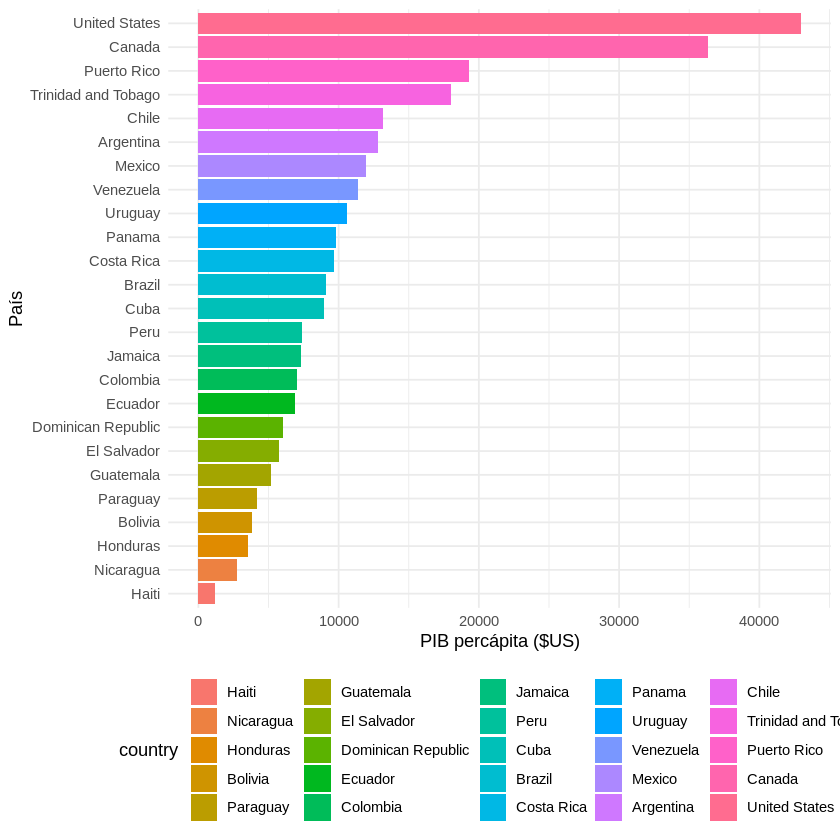

In [ ]:
gapminder %>%
  filter(year == 2007, continent == c("Americas")) %>%
  arrange(gdpPercap) %>%
  mutate(country=factor(country, country)) %>%
  ggplot( aes(x=country, y=gdpPercap, fill=country) ) +
    geom_bar(stat="identity") +
    labs(x = "País", y = "PIB percápita ($US)",
         color = "País") +
    coord_flip() +
    theme_minimal() +
    theme(legend.position = "bottom")

Se puede mejorar usando un solo color como en la figura de la sección pasada. Sin embargo, los colores sí se pueden emplear para comunicar un mensaje.

Si por ejemplo queremos hacer énfasis en el dato de Colombia, podemos ayudarnos con el color. Los colores nos podrían ayudar para resaltar los datos para una sola categoría, como se muestra en la siguiente figura.

In [ ]:
install.packages("gghighlight")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘ggrepel’




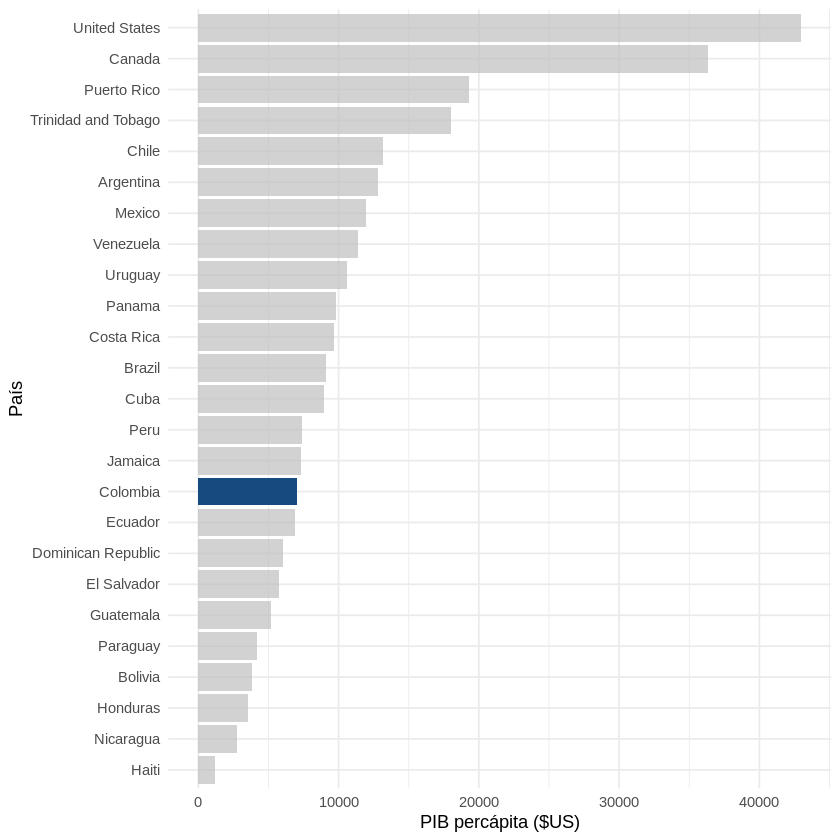

In [ ]:
library(gghighlight)
BLUE1 <- '#174A7E'

gapminder %>%
  filter(year == 2007, continent == c("Americas")) %>%
  arrange(gdpPercap) %>%
  mutate(country=factor(country, country)) %>%
  ggplot( aes(x=country, y=gdpPercap, fill=country) ) +
  geom_bar(stat="identity", fill = BLUE1) +
    labs(x = "País", y = "PIB percápita ($US)",
         color = "País") +
    coord_flip() +
    theme_minimal() +
    theme(legend.position = "bottom") +
  gghighlight(country == 'Colombia', use_direct_label = F)

Mira con detalle la última línea del código. En este caso empleamos la función `gghighlight()` del paquete [gghighlight](https://cran.r-project.org/package=gghighlight) que permite agregar la posibilidad de resaltar una sola barra.

## Evita los gráficos Spaghetti

Los gráficos de líneas pueden ser confusos si contamos con muchas variables. Por ejemplo, en la siguiente figura es complicado seguir la evolución de una sola línea; incluso los colores de la leyenda son difíciles de identificar. Estos gráficos se conocen como gráficos Spaghetti, pues se parecen a un plato de Spaghetti donde es difícil identificar un solo Spaghetti.

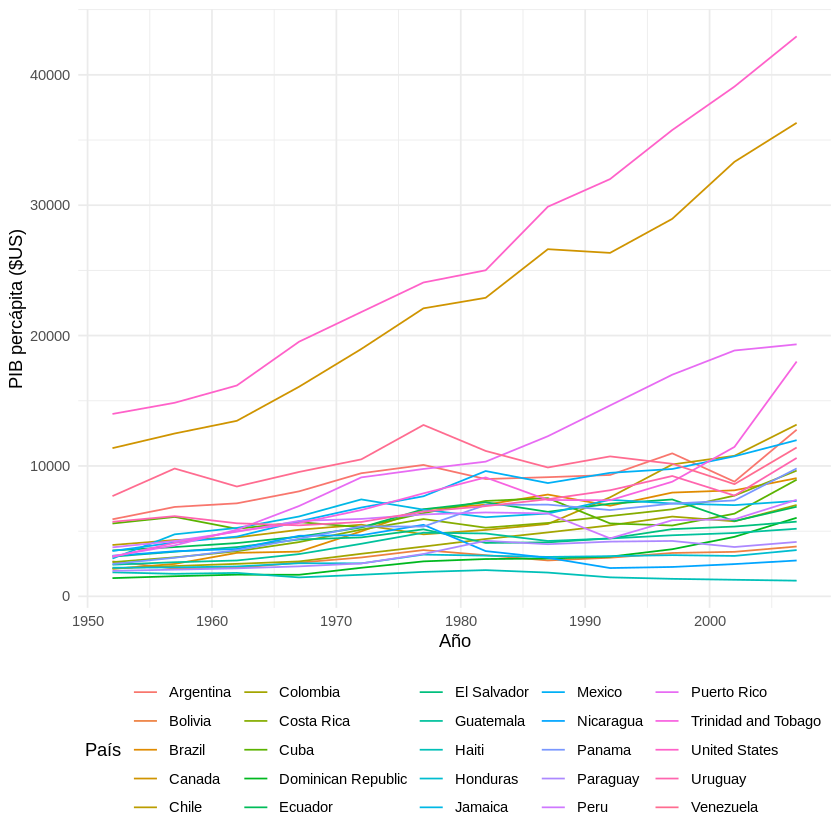

In [ ]:
gapminder %>%
  filter(continent == c("Americas")) %>%
  ggplot( aes(x=year, y=gdpPercap,  color=country)) +
    geom_line() +
    labs(x = "Año", y = "PIB percápita ($US)",
         color = "País") +
    theme_minimal() +
    theme(legend.position = "bottom")

Ahora, supón que la historia que quieres contar tiene que ver con Colombia. En ese caso, la anterior visualización se puede mejorar empleando un color para resaltar los datos de Colombia. Al resaltar la variable que se quiere enfatizar, se reducen las distracciones. Además podemos eliminar los colores de las demás leyendas. Y finalmente podemos incluir un texto para enfatizar el mensaje que queramos transmitir.

Para generar la siguiente figura empleamos por primera vez la función `geom_label()` que incluye una capa con texto (capa de Texto). Esta función requiere tres argumentos: los primeros dos corresponden a las coordenadas en las que se pondrá el inicio de la leyenda (argumentos x y y), el tercer argumento es el texto de la etiqueta (label).

Warning message:
“Tried to calculate with group_by(), but the calculation failed.
Falling back to ungrouped filter operation...”
Warning message:
“Tried to calculate with group_by(), but the calculation failed.
Falling back to ungrouped filter operation...”


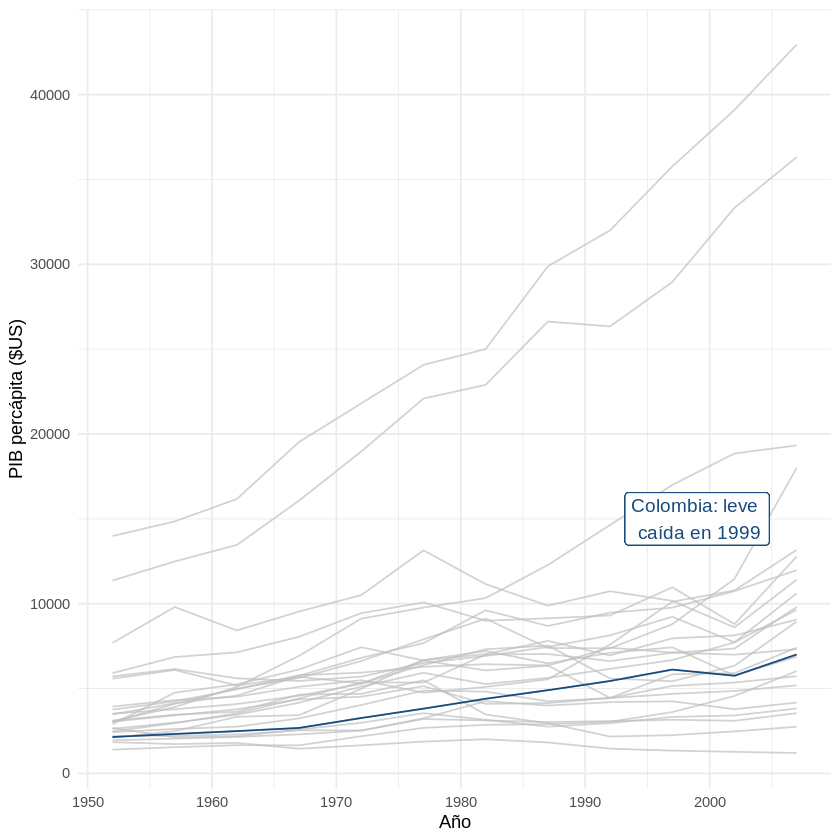

In [ ]:
gapminder %>%
   filter(continent == c("Americas")) %>%
  ggplot( aes(x = year, y = gdpPercap, group = country )) +
    geom_line(col= BLUE1) +
   labs(x = "Año", y = "PIB percápita ($US)",
         color = "País") +
  geom_label( x=1999, y=15000,
              label="Colombia: leve \n caída en 1999",
              size=4, color = BLUE1) +
    theme_minimal() +
    theme(legend.position="none") +
  gghighlight(country == 'Colombia', use_direct_label = F)

##  No uses gráficos de torta

Los gráficos de torta o pastel (pie charts) suelen ser utilizados para mostrar proporciones, donde la suma de todos los grupos da el 100%. Estos gráficos **NO** son recomendados porque el ojo humano no es bueno midiendo ángulos. El uso de los gráficos de pastel termina distorsionando la información al no lograr comunicar de forma efectiva el mensaje. Resulta complicado ordenar o determinar qué grupo es el más grande.

Una alternativa para presentar los datos con mayor claridad es el **gráfico de barras**. Esta visualización resulta mucho más sencilla de leer.

En resumen, no uses los gráficos de pastel y menos aquellos en 3D. Los gráficos de pastel en 3D resultan aún peor para la lectura de la información.

## Preguntas 3

- ¿Cómo mejorarías esta visualización? `Quitaría los colores`.

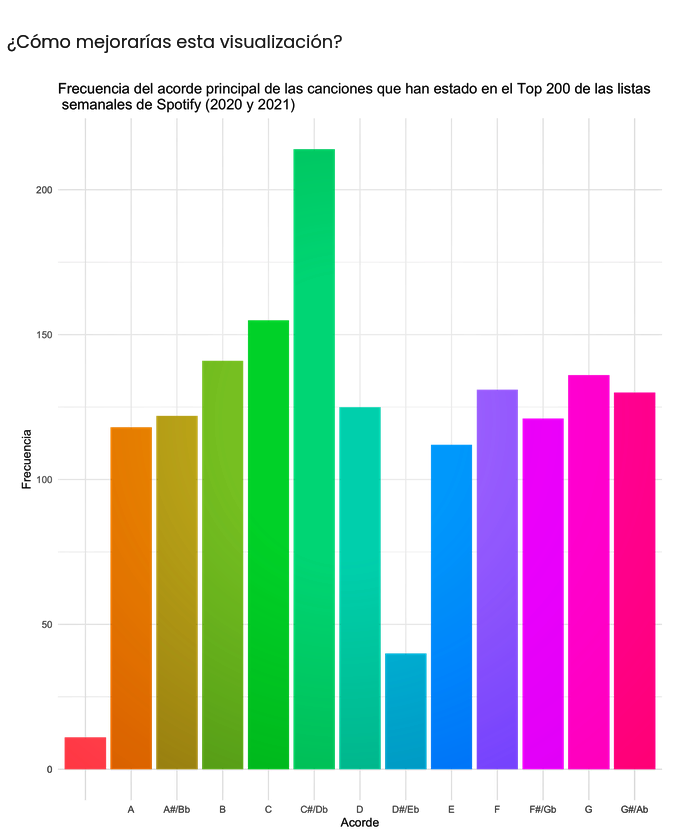

- ¿Cómo mejorarías esta visualización? `Ordenaría las barras`.

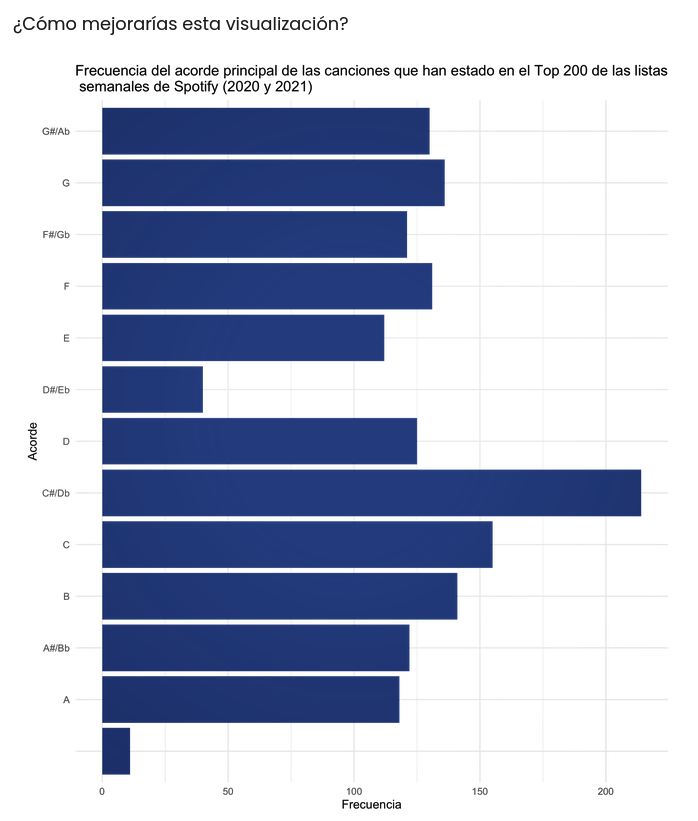

# Últimas consideraciones

Para terminar,  discutiremos rápidamente cómo convertir nuestros gráficos en interactivos y crear animaciones a partir de ellos. Lee el Capítulo 7  del libro

The book discusses the versatility of the ggplot2 package in creating impactful visualizations in R, especially when combined with dplyr for optimized workflow. Two notable packages enhancing ggplot's capabilities are highlighted: plotly for interactive visualizations and gganimate for animated graphics.

## Plotly para interactividad
   
Transforma visualizaciones de ggplot2 en gráficos interactivos. Realicemos el gráfico de burbujas con el PIB per cápita, esperanza de vida, población y color del continente

In [ ]:
install.packages("plotly")
library(plotly)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [ ]:
g1 <- gapminder %>%
  filter(year == 2007) %>%
  ggplot(aes(x = gdpPercap, y = lifeExp,
        size = pop, col = continent )) +
    geom_point() +
    labs(
      x = "PIB percápita ($US)",
      y = "Esp. de vida",
      size = "Población",
      col = "Continente"
    ) +
    theme_minimal() +
    theme(legend.position = "bottom"
  )

# ggplotly recibe un objeto ggplot
ggplotly(g1)

## Gganimate para animaciones

Genera gráficos animados. Realicemos el gráfico animado con la evolución de la esperanza de vida y el PIB per cápita en el tiempo, segmentado por continente.

In [ ]:
install.packages("gganimate")
library(gganimate)

In [ ]:
g.anidado <- ggplot(gapminder, aes(x = gdpPercap, y= lifeExp,
                              size = pop, colour = country)) +
  geom_point(alpha = 0.7, show.legend = FALSE) +
  scale_colour_manual(values = country_colors) +
  scale_size(range = c(2, 12)) +
  facet_wrap(~continent) +
    theme_minimal() +
  labs(title = 'Año: {frame_time}',
       x = 'PIB percápita',
       y = 'Esperanza de vida (años)') +
  transition_time(year) +
  ease_aes('linear')

g.anidado

# Evaluación

## 1

La siguiente visualización fue creada empleando ggplot2, dplyr y los datos de gapminder para 2002. Ordena las líneas de código para poder replicar de manera exacta la visualización. (Recuerda que puedes chequear tu pregunta con R antes de enviarla)

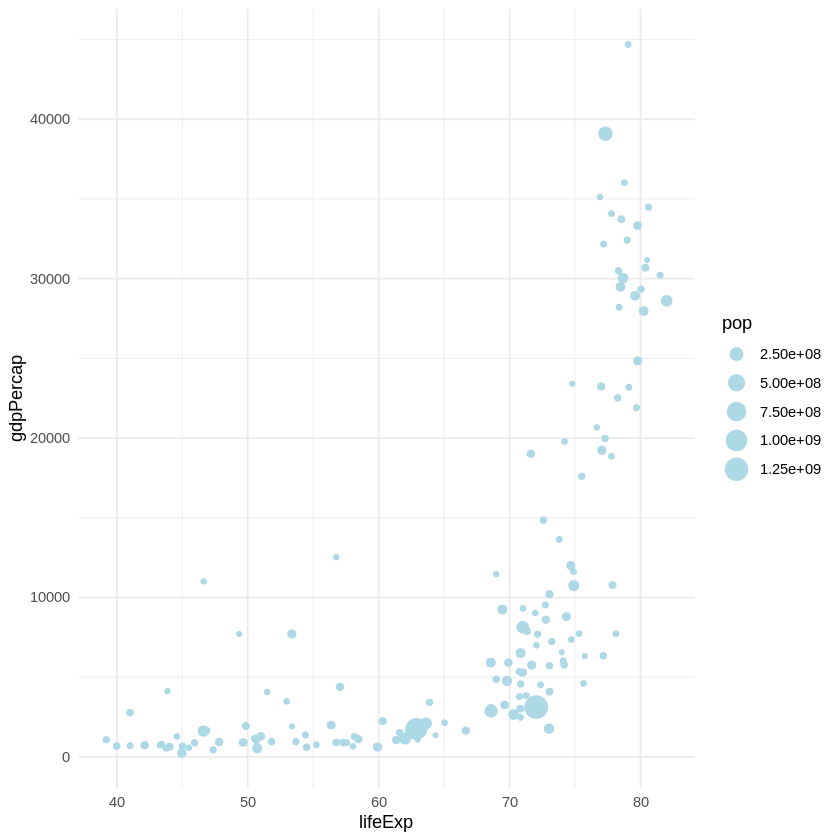

In [ ]:
gapminder %>%
  filter(year == 2002) %>%
  ggplot(aes(x = lifeExp, y = gdpPercap, size = pop)) +
  geom_point(col = "lightblue") +
  theme_minimal()

## 2

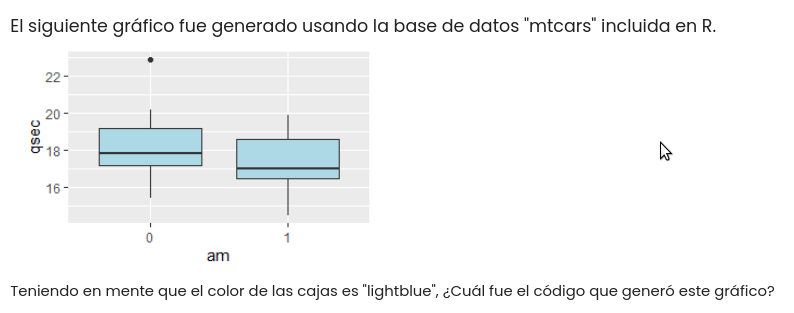

In [ ]:
install.packages("mtcars")
library(mtcars)

In [ ]:
ggplot(mtcars, aes(x = am, y = qsec)) + geom_boxplot(fill = "lightblue")

## 3

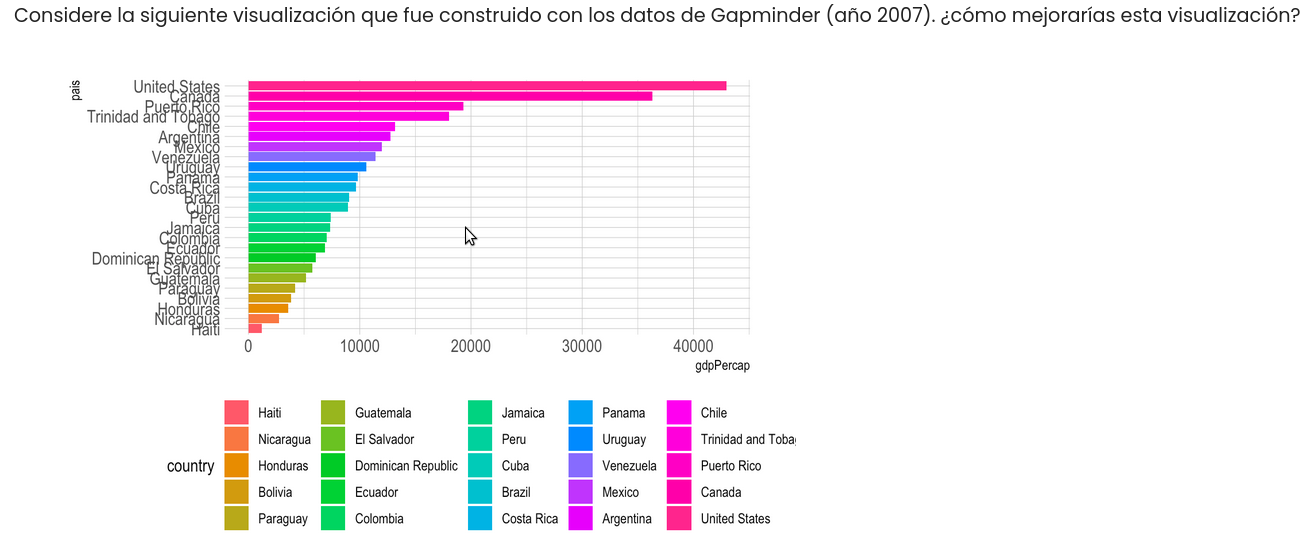

Eliminaría el color.

## 4

Se me olvidó anotarlo, ni modo

## 5

Una profesional de mercadeo desea visualizar el comportamiento de las ventas de la compañía en los últimos 10 años. El tipo de gráfico que debería emplear la profesional de mercadeo es `un gráfico de líneas`.

# Recursos

- [Empezando a visualizar datos con R y ggplot2 (2da ed.)](https://www.icesi.edu.co/editorial/empezando-visualizar-2ed/)
- [Wordclouds en R](https://repository.icesi.edu.co/biblioteca_digital/handle/10906/109158)
- [Trucos para R Markdown](https://repository.icesi.edu.co/biblioteca_digital/handle/10906/109115)
- [Dashboards en R](https://repository.icesi.edu.co/biblioteca_digital/handle/10906/109114)
- [R Graph Library](https://r-graph-gallery.com/)
- [ggplot cheatsheet](https://rstudio.github.io/cheatsheets/data-visualization.pdf)
- [R Graphics Cookbook](https://r-graphics.org/)
- [Elegant Graphics for Data Analysis](https://ggplot2-book.org/)
- [Plotly Docs](https://plotly-r.com/)
- [Introducción a Plotly](https://www.youtube.com/watch?v=EWjxic2ce9g)